# Chapter3 Classification

## Questions

## Notes

- We will investigate classification and we will look at the MNIST dataset.


In [31]:
from sklearn.datasets import fetch_openml


mnist = fetch_openml("mnist_784", version=1)

mnist.keys()

c:\Users\ayber\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [32]:
X, y = mnist["data"], mnist["target"]

X.shape, y.shape

((70000, 784), (70000,))

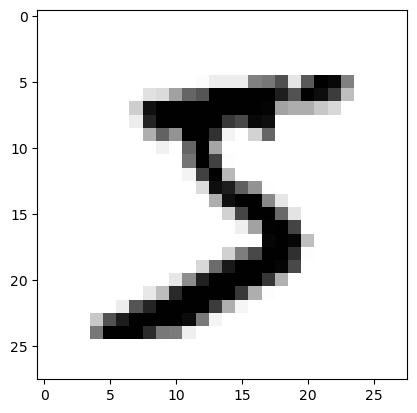

In [33]:
import matplotlib
import matplotlib.pyplot as plt

some_digit = X.values[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")

In [34]:
# label

y[0]

'5'

In [35]:
import numpy as np
y = y.astype(np.uint8)

In [36]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

This datasset is already shuffled learning algorithms are sensitive to the order of the training instances and they perform poorly if they get many similar instances in a row. Shuffling the dataset ensures that this won't happen.

In [37]:
# Training a binary classifier

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5) 

In [38]:
# Now lets pic a classifier

from sklearn.linear_model import SGDClassifier

sgf_clf = SGDClassifier(random_state=42)
sgf_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [39]:
sgf_clf.predict([some_digit])

c:\Users\ayber\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

### Performance Measures

#### Measuring accuracy using cross-validation.

- Let's use the cross_val_score() function to evaluate our SGDClassifier model using K-fold cross-validation with three folds.Remember that K-fold cross-validation means splitting the training set into K folds

In [40]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgf_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

This in not suprising since 10 percent of the images are 5s. so if you always guess that an image is not a 5 you will be right about 90 percent of the time.

This Demonstrates why accuracy is generally not the preferred performance measure for classifiers especially when you are dealing with skewed datasets.

### Confision Matrix

In [41]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgf_clf ,X_train, y_train_5, cv=3)


In [42]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

### Precision and Recall

- Confusion matrix gives yuou a lot of information but sometimes you may prefer a more concise metric. An interesting one to lok at is the accuracy of the postigve prediction this is called the precision of the classifier.

- Precision = TP/ (TP+FP)

- A trivial way to have perfect precision is to make one single positiver prediction and ensure it is correct. But this would not be very useful since the classifier would ignore all but one positive instance so precision is typically used along with another metric named _recall_ also called sensitivity or the true positive rate; this is the ratio of positive instances that are correctylt detected by the classifier.

- False ; this is the real, Negative; this is the prediction

- In simpler words, precision answers the question: "What proportion of positive identifications was actually correct?"

- 

In [43]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)


0.8370879772350012

In [44]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [45]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

F1 Score favors classifiers that have similar precision and recall. This is not always what you wnat. In some contexts you mostly care about precisiion and in other contexts you really care about recall. For example if you trained a classifier to detect videos that are safe for kids, you would probably prefer a classifier that rejects many good videos (low recall), but keeps only safe ones (high precision), rather than a classifier that has a much higher recall but lets a few really bad videos show up in your product (In such cases you may even want to add a human pipeline to check classifiers video selection). On the other hand suppose you train a classifier to detect shoplifters in surveillance immages it is probably fine if your classifier has only 30 percent precision as long as it has 00 recall.

Ungirtunately you can't have it both ways increasing precision reduces recall and vice verco this is calle dthe precision recall trade ff.


### Precision/Recall Trade-off

- Wen you try to adjust precision to be a better value recall increases

In [46]:
y_scores = sgf_clf.decision_function([some_digit])
y_scores

c:\Users\ayber\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2164.22030239])

As you can see it is fairly easy to create a classifier with vurtyakky any precision you wnat: just set a high enough threshold and you;re done but sait not so fast a high precision classifier is not very useful if its recall is too low

- If someone says lets reach 00 precision you should ask as what recall.

### The ROC Curve

- Reciever operating characteristic curve is another common tool used with binary classifiers.

- It is very similar to the precision recall curve but instead of plotting precision versus reca;; the ROC cureve plots the true positeve rate against the (Recall) against the false positive rate. The FPR is the ratio of negative instances that are incorrectyle classified as positive . It is equal to 1 the true negative rate which is the ratio of negative insatances that are correctyly classified as negative. The TNR is also called specifity. ROC curve plots the sensitivity versys specifity.

- One way to compare classifiers is to measure the area untder the curve (AUC) A perfect classifier will have a ROC AUUC equal to 1 whereaes pure random ROC AUC scikit learn provides a fucntion to compute the ROC AUC

- Since thr ROC curve is similar to precision/racal curve you may wonder how to decide thish one to use. As a rule of thimb you should prefer the PR curve whenever the poistive class is rare or when you care more about the false positives the false negatives. Otherwise use the ROC curve for ezamle looking at the previous ROC curve and the ROC AUC score you. In contrast the PR curve makes it clear that the classifier has room for improvement (the curve could be clopser to the top corner).

### Multiclass Classification.

- Whereas binary classifiers distinguish between two classes multiclass classifiers can distinguish between more than two classes.

- Some algorithms such as SGD classifiers Random forest classifiers and naive bayes classifiers are capable of hangling multiple classes natively.

- You can also use multiclass classifications using logistic regression or support vecore machine classifiers you can perform multiclass classification.

- Another strategy is to train a binary classifier for every pair of digit, one to distinguish 0s and 1s another to distinguish -1s and 2s another Then when you want to classify an image you get the decision score from each class ifier for that image and you the class whose class ouputs the highest score.

- For most bunary classifaction algorithms ONE VERSUS THE RESTR STRAGEGY is preferred

- Scikit learn detects when you try to use a binary classification algorithm for a multiclass classification task and it automatically runs OvR or OvO deoending on teh algoruthm. Let's try with a suport vectore machine .

- In order to creatre a multiclass classifier using the OvR strategy based on an SVC;

- Always look at the confusion matrix.

### Error Analysis

- analyze the types of errors it makes.

- Look at the confusion matrix.

- After you create confusion matrix, you can divide every element by its sum of the corresponding label to see what percent you got right and wrong and which one is most confusing the algorithm.

- By this you can also tell when you made a prediction was it right? and how many of them were right.

- 
